# Interactive widgets

First, import some modules and custom functions.

In [6]:
from simulation import *
from aesthetics import *
from models import *
from data import *
from analysis import *
from thresholding import *

import glob
import os as os
import re as re
import pandas as pd

%reload_ext autoreload
%autoreload 2
%matplotlib inline
mpl.rc('text', usetex=True)
cmap = sns.color_palette("Paired", 10)

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

Now, there are a couple of different types of plots we'd like to make. The first type of plot will be a threshold plot that shows, for a given system, how many angles have flux above a certain level. First we define the basic plotting function.

In [90]:
def threshold_plot(system=adk_scan, thresholds=[1, 10]):
    fig = plt.figure(figsize=(6 * 1.2, 6))
    gs = GridSpec(1, 1, wspace=0.2, hspace=0.5)
    ax = plt.subplot(gs[0, 0])
    cmap = sns.color_palette("Paired", 10)
    print('System = {}'.format(system.name))
    if system.name == 'ADK':
        clr = cmap[1]
    elif system.name == 'PKA':
        clr = cmap[3]
    elif system.name == 'HIV':
        clr = cmap[5]
    line_styles = ['-', '--']
    for threshold in thresholds:
        print('Threshold = {}'.format(threshold))
        x, y = find_above_threshold(system, threshold)
        ax.plot(x, y, c=clr, ls=line_styles[thresholds.index(threshold)],
                label=str(system.name) + ', ' + str(threshold))
    ax.set_xlabel('Substrate concentration (M)')
    ax.set_ylabel('Number of angles over threshold')
    ax.set_xscale('log')
    ax.set_xlim([10**-6, 10**-2])
    ax.set_ylim([0, 50])
    ax.legend(loc='upper left', frameon=True)
    aesthetics.paper_plot(fig)

System = ADK
Threshold = 1
Threshold = 10


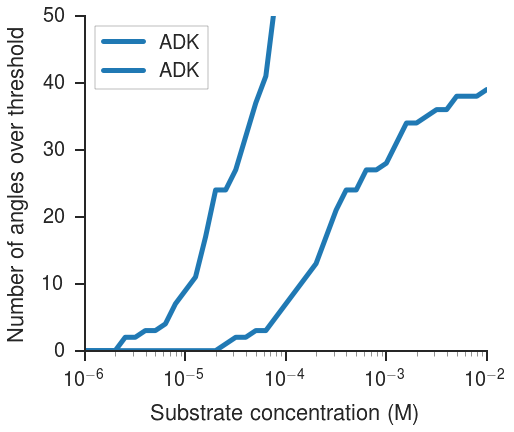

In [73]:
adk_scan = pd.read_pickle('adk-concentration-scan.pickle')
adk_scan.name = 'ADK'
thresholds = [1, 10]
threshold_plot(adk_scan, thresholds)

In [42]:
adk_scan = pd.read_pickle('adk-concentration-scan.pickle')
adk_scan.name = 'ADK @ 312'
pka_scan = pd.read_pickle('pka-concentration-scan.pickle')
pka_scan.name = 'PKA @ 140'

hiv_scan = pd.read_pickle('hiv-concentration-scan.pickle')
hiv_scan.name = 'HIV @ 0.3'
hiv_10 = pd.read_pickle('hiv-high-catalytic-rate-10.pickle')
hiv_10.name = 'HIV @ 10'
hiv_100 = pd.read_pickle('hiv-high-catalytic-rate-100.pickle')
hiv_100.name = 'HIV @ 100'
hiv_200 = pd.read_pickle('hiv-high-catalytic-rate-200.pickle')
hiv_200.name = 'HIV @ 200'
hiv_300 = pd.read_pickle('hiv-high-catalytic-rate-300.pickle')
hiv_300.name = 'HIV @ 300'

In [86]:
def threshold_wrapper(system, thresholds=[1, 10]):
    if system == 'ADK @ 312':
        df = pd.read_pickle('adk-concentration-scan.pickle')
        df.name = 'ADK'
    elif system == 'PKA @ 140':
        df = pd.read_pickle('pka-concentration-scan.pickle')
        df.name = 'PKA'
    elif system == 'HIV @ 0.3':
        df = pd.read_pickle('hiv-concentration-scan.pickle')
        df.name = 'HIV'
    elif system == 'HIV @ 10':
        df = pd.read_pickle('hiv-high-catalytic-rate-10.pickle')
        df.name = 'HIV'
    elif system == 'HIV @ 100':
        df = pd.read_pickle('hiv-high-catalytic-rate-100.pickle')
        df.name = 'HIV'
    elif system == 'HIV @ 200':
        df = pd.read_pickle('hiv-high-catalytic-rate-200.pickle')
        df.name = 'HIV'
    elif system == 'HIV @ 300':
        df = pd.read_pickle('hiv-high-catalytic-rate-300.pickle')
        df.name = 'HIV'

    threshold_plot(system=df)

System = ADK
Threshold = 1


TypeError: only integer arrays with one element can be converted to an index

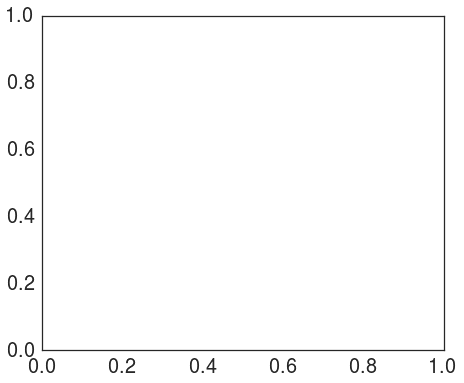

In [87]:
threshold_wrapper('ADK @ 312')

System = HIV
Threshold = 1
Threshold = 10


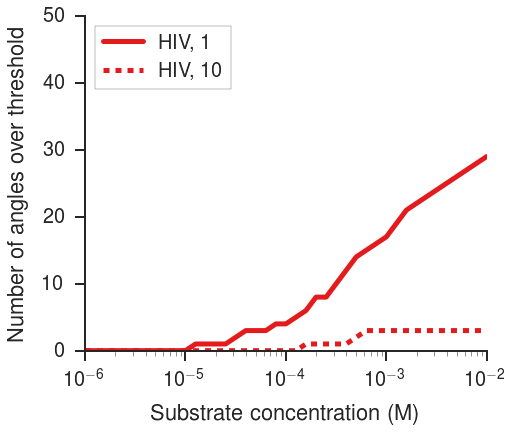

In [91]:
interact(threshold_wrapper, 
         system=['ADK @ 312', 'PKA @ 140', 'HIV @ 0.3',
                'HIV @ 10', 'HIV @ 100', 'HIV @ 200',
                'HIV @ 300'], thresholds=fixed([1,10]))

In [57]:
interact(threshold_plot, 
         systems=adk_scan, thresholds=fixed([1,10]))

ValueError:        Concentration  Directional flux  Driven flux        File  \
0               -6.0         -0.000533     0.037806   chi1ALA11   
1               -6.0         -0.000021     0.011227  chi1ALA127   
2               -6.0         -0.000119     0.025289   chi1ALA17   
3               -6.0          0.000078     0.016022  chi1ALA176   
4               -6.0          0.000033     0.006140  chi1ALA186   
5               -6.0          0.000046     0.004005  chi1ALA188   
6               -6.0          0.000029     0.004421  chi1ALA194   
7               -6.0          0.000050     0.003308  chi1ALA203   
8               -6.0          0.000026     0.003564  chi1ALA207   
9               -6.0         -0.000111     0.006404   chi1ALA37   
10              -6.0         -0.000102     0.029772   chi1ALA38   
11              -6.0         -0.000035     0.017302   chi1ALA49   
12              -6.0          0.000238     0.010412   chi1ALA55   
13              -6.0         -0.000084     0.028489   chi1ALA66   
14              -6.0         -0.000009     0.006664   chi1ALA73   
15              -6.0          0.000006     0.009484    chi1ALA8   
16              -6.0         -0.000337     0.010024   chi1ALA93   
17              -6.0         -0.000045     0.021031   chi1ALA95   
18              -6.0         -0.000082     0.006587   chi1ALA99   
19              -6.0          0.000712     0.452700  chi1ARG119   
20              -6.0         -0.004363     0.066259  chi1ARG123   
21              -6.0         -0.000367     0.031883  chi1ARG124   
22              -6.0          0.001054     0.093803  chi1ARG131   
23              -6.0         -0.032546     0.359961  chi1ARG156   
24              -6.0         -0.000781     0.106200  chi1ARG165   
25              -6.0         -0.000182     0.084682  chi1ARG167   
26              -6.0         -0.103526     0.288414    chi1ARG2   
27              -6.0         -0.000205     0.067453  chi1ARG206   
28              -6.0          0.000392     0.283658   chi1ARG36   
29              -6.0          0.000133     0.075885   chi1ARG71   
...              ...               ...          ...         ...   
54150           -0.1          0.000015    29.787230   psiTHR199   
54151           -0.1          0.000126    50.653898    psiTHR31   
54152           -0.1          0.000529   160.528581    psiTHR60   
54153           -0.1         -0.000032    21.336014    psiTHR89   
54154           -0.1         -0.000976    16.210127   psiTYR105   
54155           -0.1         -0.000108    56.585040   psiTYR133   
54156           -0.1         -0.000037    31.917066   psiTYR171   
54157           -0.1         -0.000015    10.311626   psiTYR181   
54158           -0.1          0.000053    11.126751   psiTYR182   
54159           -0.1          0.011796    12.506376   psiTYR193   
54160           -0.1          0.000105    24.995178    psiTYR24   
54161           -0.1         -0.000002    24.017329   psiVAL103   
54162           -0.1          0.044164    57.423151   psiVAL106   
54163           -0.1         -0.000102    11.717070   psiVAL111   
54164           -0.1          0.000522    15.632399   psiVAL117   
54165           -0.1          0.004403    79.744464   psiVAL121   
54166           -0.1          0.000605    13.135250   psiVAL125   
54167           -0.1         -0.023543    63.019959   psiVAL132   
54168           -0.1         -0.000267     8.756118   psiVAL135   
54169           -0.1         -0.000438     0.898632   psiVAL142   
54170           -0.1          0.000107     5.006685   psiVAL148   
54171           -0.1          0.002275    16.003281   psiVAL164   
54172           -0.1          0.000198     2.182833   psiVAL169   
54173           -0.1          0.000015    44.600756   psiVAL196   
54174           -0.1         -0.000072    22.205588   psiVAL202   
54175           -0.1          0.000011     6.504852   psiVAL205   
54176           -0.1          0.000037   161.626970    psiVAL39   
54177           -0.1         -0.029047   143.524270    psiVAL59   
54178           -0.1          0.000017     5.209378    psiVAL64   
54179           -0.1          0.000112    31.059318    psiVAL68   

       Intersurface flux  Max load     Max power ResID  
0               0.010940   0.00000  0.000000e+00    11  
1               0.005050   0.00000  0.000000e+00   127  
2               0.009720   0.00000  0.000000e+00    17  
3               0.005808   0.00000  0.000000e+00   176  
4               0.002077   0.00000  0.000000e+00   186  
5               0.001648   0.00000  0.000000e+00   188  
6               0.001776   0.00000  0.000000e+00   194  
7               0.001167   0.00000  0.000000e+00   203  
8               0.001212   0.00000  0.000000e+00   207  
9               0.002601   0.00000  0.000000e+00    37  
10              0.010138   0.00000  0.000000e+00    38  
11              0.004294   0.00000  0.000000e+00    49  
12              0.002905   0.00000  0.000000e+00    55  
13              0.008232   0.00000  0.000000e+00    66  
14              0.002179   0.00000  0.000000e+00    73  
15              0.002290   0.00000  0.000000e+00     8  
16              0.004264   0.00000  0.000000e+00    93  
17              0.005107   0.00000  0.000000e+00    95  
18              0.002066   0.00000  0.000000e+00    99  
19              0.114740   0.00000  0.000000e+00   119  
20              0.031612   0.00000  0.000000e+00   123  
21              0.012281  -0.00003  1.275034e-08   124  
22              0.022474   0.00000  0.000000e+00   131  
23              0.100211   0.00000  0.000000e+00   156  
24              0.029782   0.00000  0.000000e+00   165  
25              0.056333   0.00000  0.000000e+00   167  
26              0.032971  -0.00005  3.141631e-06     2  
27              0.029004   0.00000  0.000000e+00   206  
28              0.078672   0.00000  0.000000e+00    36  
29              0.034488   0.00001  1.009318e-09    71  
...                  ...       ...           ...   ...  
54150          12.546867   0.00000  0.000000e+00   199  
54151          16.792117   0.00003  5.914642e-09    31  
54152          46.037240   0.00015  1.122639e-07    60  
54153           8.700838  -0.00002  5.678599e-10    89  
54154           6.146817  -0.00004  6.805370e-08   105  
54155          16.685188  -0.00006  1.838188e-08   133  
54156          11.958286  -0.00003  3.999462e-09   171  
54157           4.731217  -0.00007  1.590690e-08   181  
54158           4.274168   0.00002  3.117149e-09   182  
54159           4.861791   0.00002  9.357395e-08   193  
54160           9.165436   0.00002  4.463975e-09    24  
54161           5.401641   0.00000  0.000000e+00   103  
54162          13.729813   0.00006  7.384062e-07   106  
54163           8.166570  -0.00001  6.657405e-10   111  
54164           5.483202   0.00005  2.857202e-08   117  
54165          28.037428   0.00002  1.102574e-07   121  
54166           5.331679   0.00005  2.845279e-08   125  
54167          20.642454  -0.00003  3.241508e-07   132  
54168           3.454342  -0.00004  5.864673e-09   135  
54169           0.351415  -0.00007  3.745223e-08   142  
54170           1.300624   0.00001  2.984989e-09   148  
54171           6.358853   0.00005  1.300496e-07   164  
54172           0.735250   0.00008  2.646213e-08   169  
54173          13.880933   0.00000  0.000000e+00   196  
54174           7.249100  -0.00006  1.222859e-08   202  
54175           2.328834   0.00002  1.228878e-09   205  
54176          47.809217   0.00005  9.191463e-09    39  
54177          41.928575  -0.00093  2.629803e-05    59  
54178           3.403589   0.00002  4.292836e-09    64  
54179          10.960752   0.00001  3.293454e-09    68  

[54180 rows x 8 columns] cannot be transformed to a Widget

In [65]:
def f(a, b):
    return a[b].head(1).values[0]
f(adk_scan, 'File')

'chi1ALA11'

In [66]:
w = interact(f, a=adk_scan, b='File')

ValueError:        Concentration  Directional flux  Driven flux        File  \
0               -6.0         -0.000533     0.037806   chi1ALA11   
1               -6.0         -0.000021     0.011227  chi1ALA127   
2               -6.0         -0.000119     0.025289   chi1ALA17   
3               -6.0          0.000078     0.016022  chi1ALA176   
4               -6.0          0.000033     0.006140  chi1ALA186   
5               -6.0          0.000046     0.004005  chi1ALA188   
6               -6.0          0.000029     0.004421  chi1ALA194   
7               -6.0          0.000050     0.003308  chi1ALA203   
8               -6.0          0.000026     0.003564  chi1ALA207   
9               -6.0         -0.000111     0.006404   chi1ALA37   
10              -6.0         -0.000102     0.029772   chi1ALA38   
11              -6.0         -0.000035     0.017302   chi1ALA49   
12              -6.0          0.000238     0.010412   chi1ALA55   
13              -6.0         -0.000084     0.028489   chi1ALA66   
14              -6.0         -0.000009     0.006664   chi1ALA73   
15              -6.0          0.000006     0.009484    chi1ALA8   
16              -6.0         -0.000337     0.010024   chi1ALA93   
17              -6.0         -0.000045     0.021031   chi1ALA95   
18              -6.0         -0.000082     0.006587   chi1ALA99   
19              -6.0          0.000712     0.452700  chi1ARG119   
20              -6.0         -0.004363     0.066259  chi1ARG123   
21              -6.0         -0.000367     0.031883  chi1ARG124   
22              -6.0          0.001054     0.093803  chi1ARG131   
23              -6.0         -0.032546     0.359961  chi1ARG156   
24              -6.0         -0.000781     0.106200  chi1ARG165   
25              -6.0         -0.000182     0.084682  chi1ARG167   
26              -6.0         -0.103526     0.288414    chi1ARG2   
27              -6.0         -0.000205     0.067453  chi1ARG206   
28              -6.0          0.000392     0.283658   chi1ARG36   
29              -6.0          0.000133     0.075885   chi1ARG71   
...              ...               ...          ...         ...   
54150           -0.1          0.000015    29.787230   psiTHR199   
54151           -0.1          0.000126    50.653898    psiTHR31   
54152           -0.1          0.000529   160.528581    psiTHR60   
54153           -0.1         -0.000032    21.336014    psiTHR89   
54154           -0.1         -0.000976    16.210127   psiTYR105   
54155           -0.1         -0.000108    56.585040   psiTYR133   
54156           -0.1         -0.000037    31.917066   psiTYR171   
54157           -0.1         -0.000015    10.311626   psiTYR181   
54158           -0.1          0.000053    11.126751   psiTYR182   
54159           -0.1          0.011796    12.506376   psiTYR193   
54160           -0.1          0.000105    24.995178    psiTYR24   
54161           -0.1         -0.000002    24.017329   psiVAL103   
54162           -0.1          0.044164    57.423151   psiVAL106   
54163           -0.1         -0.000102    11.717070   psiVAL111   
54164           -0.1          0.000522    15.632399   psiVAL117   
54165           -0.1          0.004403    79.744464   psiVAL121   
54166           -0.1          0.000605    13.135250   psiVAL125   
54167           -0.1         -0.023543    63.019959   psiVAL132   
54168           -0.1         -0.000267     8.756118   psiVAL135   
54169           -0.1         -0.000438     0.898632   psiVAL142   
54170           -0.1          0.000107     5.006685   psiVAL148   
54171           -0.1          0.002275    16.003281   psiVAL164   
54172           -0.1          0.000198     2.182833   psiVAL169   
54173           -0.1          0.000015    44.600756   psiVAL196   
54174           -0.1         -0.000072    22.205588   psiVAL202   
54175           -0.1          0.000011     6.504852   psiVAL205   
54176           -0.1          0.000037   161.626970    psiVAL39   
54177           -0.1         -0.029047   143.524270    psiVAL59   
54178           -0.1          0.000017     5.209378    psiVAL64   
54179           -0.1          0.000112    31.059318    psiVAL68   

       Intersurface flux  Max load     Max power ResID  
0               0.010940   0.00000  0.000000e+00    11  
1               0.005050   0.00000  0.000000e+00   127  
2               0.009720   0.00000  0.000000e+00    17  
3               0.005808   0.00000  0.000000e+00   176  
4               0.002077   0.00000  0.000000e+00   186  
5               0.001648   0.00000  0.000000e+00   188  
6               0.001776   0.00000  0.000000e+00   194  
7               0.001167   0.00000  0.000000e+00   203  
8               0.001212   0.00000  0.000000e+00   207  
9               0.002601   0.00000  0.000000e+00    37  
10              0.010138   0.00000  0.000000e+00    38  
11              0.004294   0.00000  0.000000e+00    49  
12              0.002905   0.00000  0.000000e+00    55  
13              0.008232   0.00000  0.000000e+00    66  
14              0.002179   0.00000  0.000000e+00    73  
15              0.002290   0.00000  0.000000e+00     8  
16              0.004264   0.00000  0.000000e+00    93  
17              0.005107   0.00000  0.000000e+00    95  
18              0.002066   0.00000  0.000000e+00    99  
19              0.114740   0.00000  0.000000e+00   119  
20              0.031612   0.00000  0.000000e+00   123  
21              0.012281  -0.00003  1.275034e-08   124  
22              0.022474   0.00000  0.000000e+00   131  
23              0.100211   0.00000  0.000000e+00   156  
24              0.029782   0.00000  0.000000e+00   165  
25              0.056333   0.00000  0.000000e+00   167  
26              0.032971  -0.00005  3.141631e-06     2  
27              0.029004   0.00000  0.000000e+00   206  
28              0.078672   0.00000  0.000000e+00    36  
29              0.034488   0.00001  1.009318e-09    71  
...                  ...       ...           ...   ...  
54150          12.546867   0.00000  0.000000e+00   199  
54151          16.792117   0.00003  5.914642e-09    31  
54152          46.037240   0.00015  1.122639e-07    60  
54153           8.700838  -0.00002  5.678599e-10    89  
54154           6.146817  -0.00004  6.805370e-08   105  
54155          16.685188  -0.00006  1.838188e-08   133  
54156          11.958286  -0.00003  3.999462e-09   171  
54157           4.731217  -0.00007  1.590690e-08   181  
54158           4.274168   0.00002  3.117149e-09   182  
54159           4.861791   0.00002  9.357395e-08   193  
54160           9.165436   0.00002  4.463975e-09    24  
54161           5.401641   0.00000  0.000000e+00   103  
54162          13.729813   0.00006  7.384062e-07   106  
54163           8.166570  -0.00001  6.657405e-10   111  
54164           5.483202   0.00005  2.857202e-08   117  
54165          28.037428   0.00002  1.102574e-07   121  
54166           5.331679   0.00005  2.845279e-08   125  
54167          20.642454  -0.00003  3.241508e-07   132  
54168           3.454342  -0.00004  5.864673e-09   135  
54169           0.351415  -0.00007  3.745223e-08   142  
54170           1.300624   0.00001  2.984989e-09   148  
54171           6.358853   0.00005  1.300496e-07   164  
54172           0.735250   0.00008  2.646213e-08   169  
54173          13.880933   0.00000  0.000000e+00   196  
54174           7.249100  -0.00006  1.222859e-08   202  
54175           2.328834   0.00002  1.228878e-09   205  
54176          47.809217   0.00005  9.191463e-09    39  
54177          41.928575  -0.00093  2.629803e-05    59  
54178           3.403589   0.00002  4.292836e-09    64  
54179          10.960752   0.00001  3.293454e-09    68  

[54180 rows x 8 columns] cannot be transformed to a Widget

In [56]:
import sys
from distutils import ccompiler
import multiprocessing
import datetime
print('Python', sys.version, end='\n\n')

for item in ('IPython.__version__', 
             'notebook.__version__',
             'numpy.__version__',
             'scipy.__version__',
             'matplotlib.__version__',
             'numba.__version__',
             'Cython.__version__', 
             'dask.__version__',
             'tifffile.__version__',
            ):
    module, version = item.split('.')
    try:
        lib = sys.modules[module]
    except KeyError:
        try:
            __import__(module)
        except Exception:
            continue
    print(module, getattr(lib, version))

print("\nCompiler type:", ccompiler.new_compiler().compiler_type, end='\n\n')
print(multiprocessing.cpu_count(), "CPU cores")

try:
    import psutil
    print("{:.0f} GB main memory\n".format(psutil.virtual_memory()[0] / 2**30))
except ImportError:
    pass
    
print(datetime.datetime.now())


Python 3.5.1 |Anaconda custom (64-bit)| (default, Jun 15 2016, 15:32:45) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]

IPython 4.2.0
notebook 4.2.1
numpy 1.11.1
scipy 0.17.1
matplotlib 1.5.1
numba 0.26.0
Cython 0.24
dask 0.10.0

Compiler type: unix

12 CPU cores
24 GB main memory

2017-02-04 19:28:23.773628


In [95]:
this = simulation(data_source='adk_md_data')
this.name = 'chi2THR175'
this.cSubstrate = 1e-4
this.simulate()
print(np.sum(this.ss[this.bins:2*this.bins]))

0.205396542936
